In [1]:
from dataclasses import dataclass

import networkx as nx 
import torch
from torch_geometric.nn import RGCNConv
from torch_geometric.utils import to_networkx

from custom_modules import DataGenerator, PersonnelScheduleEnv, RLagent, ActorMemoryWrapper, Actor, GNN

2024-09-16 16:25:11.258441: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2024-09-16 16:25:11.467551: E tensorflow/compiler/xla/stream_executor/cuda/cuda_dnn.cc:9342] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-09-16 16:25:11.467687: E tensorflow/compiler/xla/stream_executor/cuda/cuda_fft.cc:609] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-09-16 16:25:11.468406: E tensorflow/compiler/xla/stream_executor/cuda/cuda_blas.cc:1518] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-09-16 16:25:11.556683: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2024-09-16 16:25:11.558945: I tensorflow/core/platform/cpu_feature_guard.cc:182] This Tens

In [2]:
@dataclass
class EvaluationConfig:
    output_dir = "RL_PersSched" 
    max_steps = 28
    device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
    hidden_dim = 32
    num_message_layer = 2

config = EvaluationConfig()

In [3]:
dim_employee = 1
dim_shift = 7
gnn = GNN((dim_employee, dim_shift), hidden_dim=config.hidden_dim, num_message_layer=config.num_message_layer, device=config.device)
gnn.load(config.output_dir + "/gnn_weights")

In [5]:
env = PersonnelScheduleEnv(employees=DataGenerator.get_random_employees(5,5), shifts=DataGenerator.get_week_shifts(), assignments=DataGenerator.get_empty_assignments(), device=config.device)
agent = RLagent(gnn, env) 
actor = Actor(agent, env=env, max_steps=config.max_steps)

In [6]:
steps = actor.execute_episode()

In [7]:
print("Is terminated: ", env.terminated())
print("Planning: ")
env.get_current_planning()

Is terminated:  False
Planning: 


{0: [],
 1: [2, 0, 3, 4, 1],
 2: [],
 3: [2, 3, 0, 4, 1],
 4: [],
 5: [2, 0, 4],
 6: [],
 7: [],
 8: [],
 9: [2, 3, 0, 4, 1],
 10: [],
 11: [2, 3, 0, 4, 1],
 12: [],
 13: [2, 0, 3, 4, 1]}

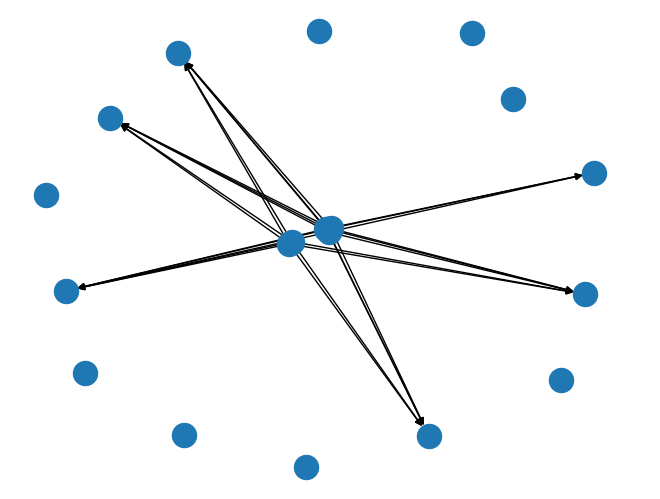

In [8]:
g=to_networkx(env.state)
nx.draw(g)